<a href="https://colab.research.google.com/github/darklucifar/machineLearn_0602/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_text.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [72]:
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

deer


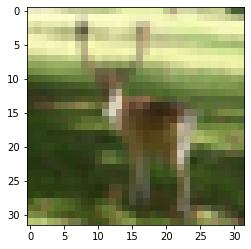

In [73]:
# mnist: (60000, ) [5, 2, 1, 0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation="relu"),
    # 128 * 10 + 10(bias) = 1290
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 512)        

In [75]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [76]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 5s - loss: 1.7947 - accuracy: 0.3308 - val_loss: 1.3525 - val_accuracy: 0.5102
Epoch 2/100
225/225 - 4s - loss: 1.3204 - accuracy: 0.5250 - val_loss: 1.0867 - val_accuracy: 0.6100
Epoch 3/100
225/225 - 4s - loss: 1.0702 - accuracy: 0.6288 - val_loss: 0.9094 - val_accuracy: 0.6848
Epoch 4/100
225/225 - 4s - loss: 0.9185 - accuracy: 0.6836 - val_loss: 0.8288 - val_accuracy: 0.7110
Epoch 5/100
225/225 - 4s - loss: 0.7808 - accuracy: 0.7337 - val_loss: 0.7418 - val_accuracy: 0.7442
Epoch 6/100
225/225 - 4s - loss: 0.6664 - accuracy: 0.7715 - val_loss: 0.6834 - val_accuracy: 0.7722
Epoch 7/100
225/225 - 4s - loss: 0.5698 - accuracy: 0.8044 - val_loss: 0.7002 - val_accuracy: 0.7662
Epoch 8/100
225/225 - 4s - loss: 0.4884 - accuracy: 0.8329 - val_loss: 0.6780 - val_accuracy: 0.7848
Epoch 9/100
225/225 - 4s - loss: 0.4087 - accuracy: 0.8605 - val_loss: 0.7214 - val_accuracy: 0.7704
Epoch 10/100
225/225 - 4s - loss: 0.3343 - accuracy: 0.8853 - val_loss: 0.7253 - val_accura

In [78]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7087 - accuracy: 0.7683


[0.7086612582206726, 0.7682999968528748]

In [79]:
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)
(10000,)
(10000,)


In [80]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),847,17,37,5,6,5,8,9,47,19
automobile(正確),12,926,3,2,0,3,5,2,12,35
bird(正確),71,11,711,27,39,55,48,26,8,4
cat(正確),35,12,98,486,43,169,78,49,14,16
deer(正確),27,5,113,43,658,21,48,77,7,1
dog(正確),17,4,54,99,40,665,33,75,9,4
frog(正確),6,6,51,21,19,15,868,7,4,3
horse(正確),11,3,37,14,24,36,2,867,2,4
ship(正確),50,36,16,5,3,5,5,3,862,15
truck(正確),32,111,10,8,1,5,2,14,24,793


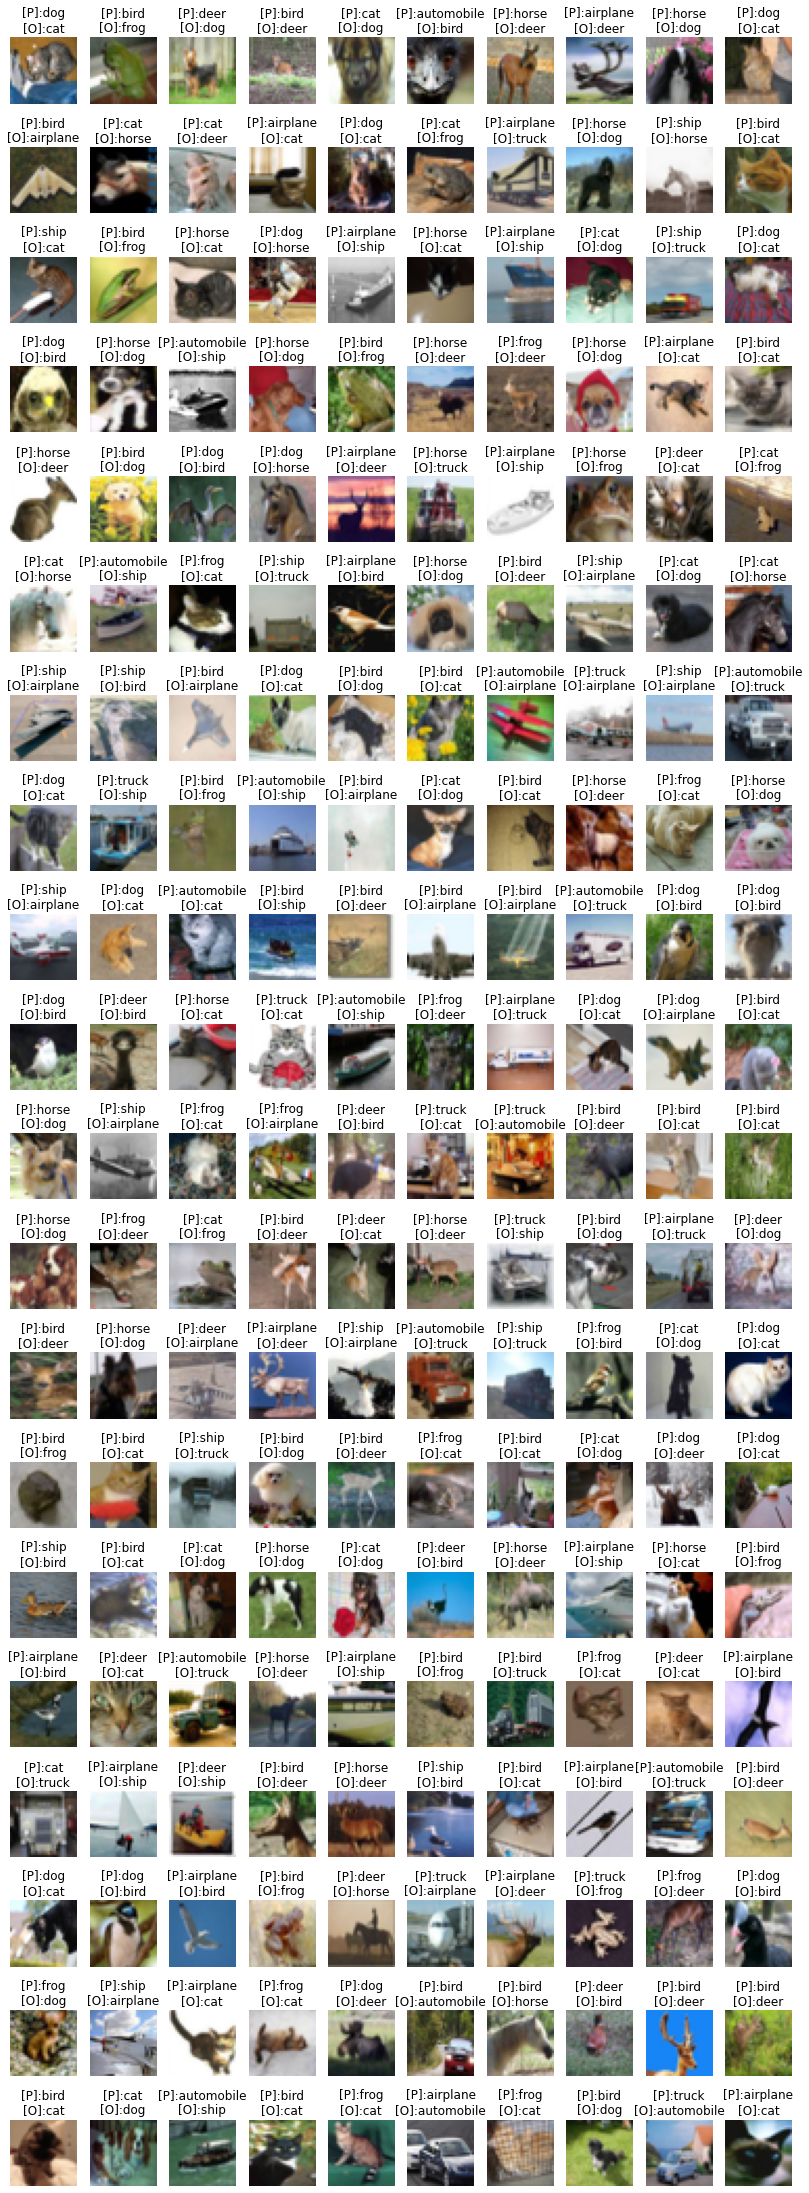

In [81]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])